In [1]:
# Import the NumPy module.
import numpy as np

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates

[(-68.0789159119924, 109.16969364709831),
 (-38.2573646570294, -149.76206081371382),
 (69.90592328275301, -91.42750270232249),
 (10.194291641647013, -14.074679444261136),
 (-59.52748324801361, 73.76923438335604),
 (-26.51574955233798, 72.78989558169573),
 (80.99780778958825, 60.940619422950164),
 (-35.789755864906155, -28.88078031404598),
 (-38.27343746581387, 69.08834048621276),
 (-27.35639561095841, 99.2430131041454),
 (43.21579685372879, 6.96309346232448),
 (77.99984192762273, 164.02406421960814),
 (3.9620596594446056, 34.51432379026056),
 (2.737132525507519, -110.75143121820659),
 (-4.012468267045762, 111.86435199412136),
 (15.414226645824954, 107.5733719202708),
 (6.444519644551704, 76.57383591657162),
 (68.13885872512262, 29.9448291066806),
 (30.44941689695969, -175.628157426583),
 (20.357118782110277, 55.4358665706618),
 (18.034587233702908, -19.567964412223773),
 (61.371639203494624, 59.364066535891254),
 (-58.455244948670625, -85.15799360617015),
 (-29.260207884379973, -22.104

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

#url variable
url = "http://api.openweathermap.org/data/2.5/weather?"

# Import the API key.
from config import weather_api_key

url+="appid="+weather_api_key 

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | boffa
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | saint-raphael
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | kaabong
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | pangkalanbuun
Processing Record 16 of Set 1 | hoi an
Processing Record 17 of Set 1 | manavalakurichi
Processing Record 18 of Set 1 | kovdor
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | nizwa
Processing Record 21 of Set 1 | nouakchott
Processing Record 22 of Set 1 

Processing Record 35 of Set 4 | esperance
Processing Record 36 of Set 4 | tuatapere
Processing Record 37 of Set 4 | sovetskiy
Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | aklavik
Processing Record 40 of Set 4 | matamoros
Processing Record 41 of Set 4 | san miguelito
Processing Record 42 of Set 4 | parrita
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | red deer
Processing Record 46 of Set 4 | soyo
Processing Record 47 of Set 4 | ulaanbaatar
Processing Record 48 of Set 4 | karanja
Processing Record 49 of Set 4 | marathon
Processing Record 50 of Set 4 | djougou
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | arman
Processing Record 3 of Set 5 | andros
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | kodinsk
Processing Record 6 of Set 5 | sambava
Processing Record 7 of Set 5 | nemuro
Processing Record 8 of S

Processing Record 29 of Set 8 | gamba
Processing Record 30 of Set 8 | angoche
Processing Record 31 of Set 8 | guerrero negro
Processing Record 32 of Set 8 | cam ranh
Processing Record 33 of Set 8 | sao felix do xingu
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | tigre
Processing Record 36 of Set 8 | sal rei
Processing Record 37 of Set 8 | kaeo
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | mazara del vallo
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | yatou
Processing Record 43 of Set 8 | verkhoyansk
Processing Record 44 of Set 8 | port hardy
Processing Record 45 of Set 8 | oudtshoorn
Processing Record 46 of Set 8 | san vicente
Processing Record 47 of Set 8 | dunedin
Processing Record 48 of Set 8 | ahipara
Processing Record 49 of Set 8 | coos bay
Processing Record 50 of Set 8 | kurmanayevka
Processing Record 1 of Set 9 | thinadhoo
Processing Record 2 of Set 9 | a

Processing Record 21 of Set 12 | kinsale
Processing Record 22 of Set 12 | sena madureira
Processing Record 23 of Set 12 | ambilobe
Processing Record 24 of Set 12 | primorsk
Processing Record 25 of Set 12 | beringovskiy
Processing Record 26 of Set 12 | suao
City not found. Skipping...
Processing Record 27 of Set 12 | pochutla
Processing Record 28 of Set 12 | pierre
Processing Record 29 of Set 12 | sinjah
City not found. Skipping...
Processing Record 30 of Set 12 | sinyavino
Processing Record 31 of Set 12 | kyzyl-suu
Processing Record 32 of Set 12 | pascagoula
Processing Record 33 of Set 12 | lagos
Processing Record 34 of Set 12 | sorong
Processing Record 35 of Set 12 | douglas
Processing Record 36 of Set 12 | cardoso
Processing Record 37 of Set 12 | barra do bugres
Processing Record 38 of Set 12 | jumla
Processing Record 39 of Set 12 | nizhniy tsasuchey
Processing Record 40 of Set 12 | richards bay
Processing Record 41 of Set 12 | ayios kirikos
City not found. Skipping...
Processing Rec

In [10]:
# seeing if we have at least 500 cities
len(city_data)

551

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,292.04,89,100,0.69,US,2020-06-28 01:51:25
1,Mataura,-46.19,168.86,279.87,94,100,1.03,NZ,2020-06-28 01:49:31
2,Thompson,55.74,-97.86,289.15,93,75,5.10,CA,2020-06-28 01:51:21
3,Boffa,10.17,-14.03,297.91,87,67,0.67,GN,2020-06-28 01:51:28
4,Saint-Philippe,-21.36,55.77,293.15,77,20,2.10,RE,2020-06-28 01:51:20
5,Bambous Virieux,-20.34,57.76,295.37,83,40,5.10,MU,2020-06-28 01:51:28
6,Arraial Do Cabo,-22.97,-42.03,294.24,85,85,8.14,BR,2020-06-28 01:51:28
7,Mahebourg,-20.41,57.70,295.15,83,40,5.10,MU,2020-06-28 01:51:28
8,Carnarvon,-24.87,113.63,293.15,100,40,4.60,AU,2020-06-28 01:51:29
9,Saint-Raphael,19.43,-72.20,297.02,93,86,1.77,HT,2020-06-28 01:51:29


In [12]:
# Define column order as "new_order"
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Create new order for columns

city_data_df = city_data_df[new_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-06-28 01:51:25,42.60,-73.97,292.04,89,100,0.69
1,Mataura,NZ,2020-06-28 01:49:31,-46.19,168.86,279.87,94,100,1.03
2,Thompson,CA,2020-06-28 01:51:21,55.74,-97.86,289.15,93,75,5.10
3,Boffa,GN,2020-06-28 01:51:28,10.17,-14.03,297.91,87,67,0.67
4,Saint-Philippe,RE,2020-06-28 01:51:20,-21.36,55.77,293.15,77,20,2.10
5,Bambous Virieux,MU,2020-06-28 01:51:28,-20.34,57.76,295.37,83,40,5.10
6,Arraial Do Cabo,BR,2020-06-28 01:51:28,-22.97,-42.03,294.24,85,85,8.14
7,Mahebourg,MU,2020-06-28 01:51:28,-20.41,57.70,295.15,83,40,5.10
8,Carnarvon,AU,2020-06-28 01:51:29,-24.87,113.63,293.15,100,40,4.60
9,Saint-Raphael,HT,2020-06-28 01:51:29,19.43,-72.20,297.02,93,86,1.77


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

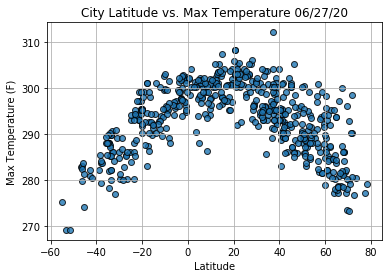

In [23]:
#PLOT MAX TEMPS
# Import the time module.
import time
# Get today's date in seconds formatted as MM/DD/YY

today = time.strftime("%x")

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

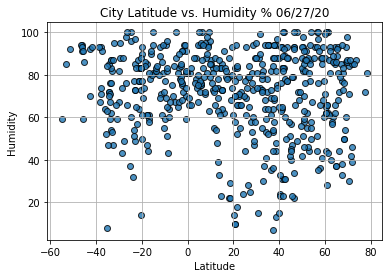

In [24]:
#PLOT HUMIDITY
# Import the time module.
import time
# Get today's date in seconds formatted as MM/DD/YY

today = time.strftime("%x")

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

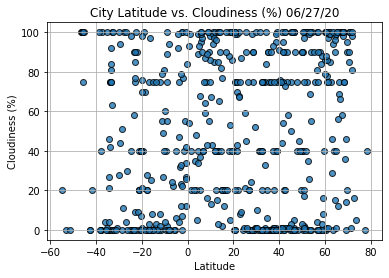

In [25]:
#PLOT CLOUDINESS
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

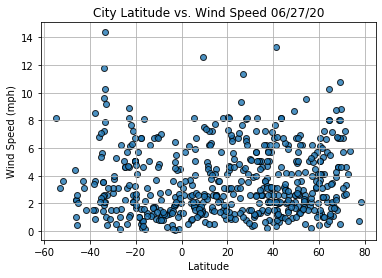

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

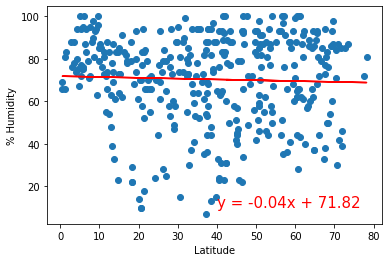

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

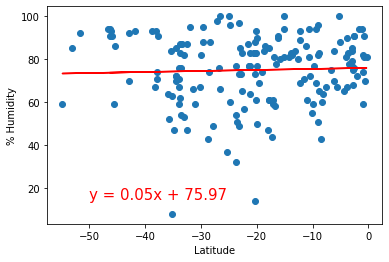

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

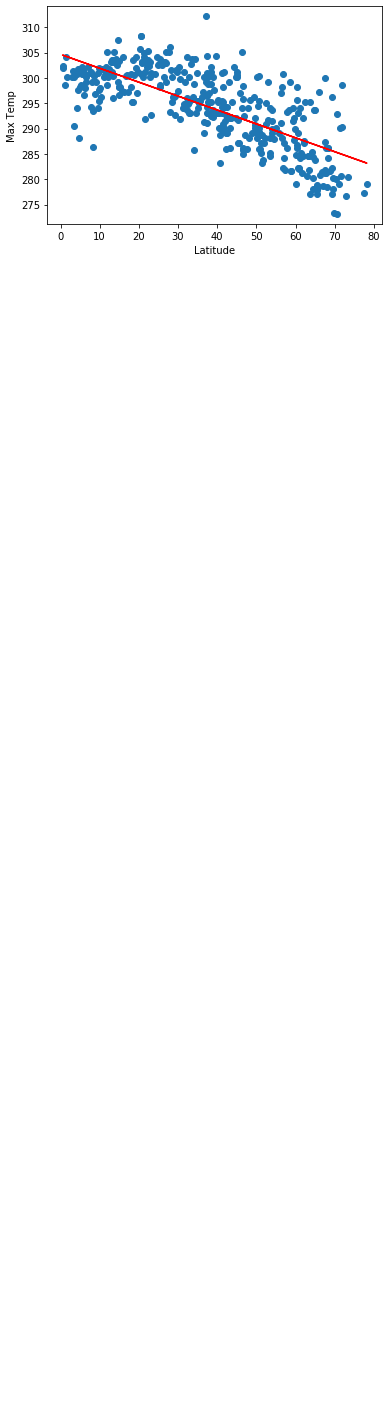

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemispher for Max Temp', 'Max Temp',(10,40))

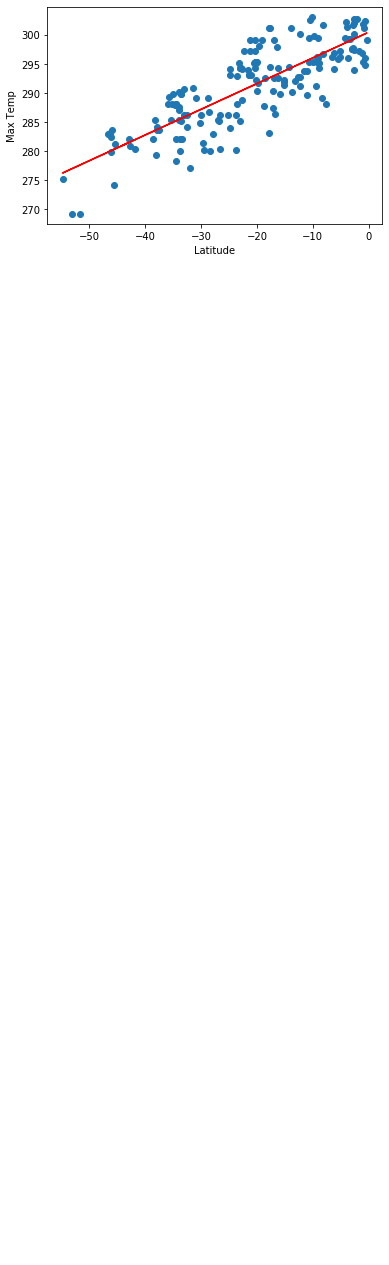

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))